# Introduction to Breast Cancer Classification using Logistic Regression

## Project Overview
In this Jupyter Notebook, we will tackle the problem of classifying breast cancer cases into malignant or benign categories using logistic regression, a fundamental technique in machine learning. The dataset utilized in this project is the Breast Cancer dataset provided by scikit-learn, which includes various features such as mean radius, texture, and area of the cancer cells.

## Objective
The main goal is to develop a logistic regression model to accurately predict whether a case is malignant or benign based on the features provided in the dataset. This model will help in understanding the applicability of logistic regression in medical diagnosis.

## Steps Covered
1. **Data Loading:** Import the dataset from scikit-learn and examine its structure.
2. **Data Preparation:** Process and split the dataset into training and testing sets to ensure a fair assessment of the model's performance.
3. **Model Training:** Train a logistic regression model using the training data.
4. **Model Evaluation:** Evaluate the model's accuracy and effectiveness using the testing set.
5. **Result Visualization:** Display results and metrics, such as confusion matrices and classification reports, to interpret the model's performance.

## Conclusion
This notebook will provide insights into the basic application of logistic regression in binary classification tasks, particularly in a healthcare context. By the end, we will have a clear understanding of the model


In [1]:
!pip install pandas  # Install pandas library for data manipulation and analysis
!pip install numpy  # Install numpy library for numerical computations
!pip install matplotlib  # Install matplotlib library for creating visualizations
!pip install seaborn  # Install seaborn library for statistical data visualization
!pip install scikit-learn  # Install scikit-learn library for machine learning algorithms



ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [7]:
import pandas as pd  # Importing Pandas library and aliasing it as pd for easier usage
import numpy as np   # Importing NumPy library and aliasing it as np for easier usage
import matplotlib.pyplot as plt  # Importing Matplotlib's pyplot module and aliasing it as plt for easier usage
import seaborn as sns  # Importing Seaborn library and aliasing it as sns for easier usage
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn's model_selection module
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression class from scikit-learn's linear_model module
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Importing specific evaluation metrics from scikit-learn's metrics module
from sklearn.datasets import load_breast_cancer  # Importing load_breast_cancer dataset from scikit-learn's datasets module
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling

In [3]:
data = load_breast_cancer()  # Loads the breast cancer dataset from scikit-learn into the variable 'data'
df = pd.DataFrame(data.data, columns=data.feature_names)  # Creates a Pandas DataFrame 'df' with dataset's data and feature names as columns
df['target'] = data.target  # Adds a new column 'target' to the DataFrame containing the target labels


In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# List of All Columns:

1. **mean radius**: Average size of the cell nuclei.
2. **mean texture**: Standard deviation of gray-scale values.
3. **mean perimeter**: Average perimeter of the cell nuclei.
4. **mean area**: Average area of the cell nuclei.
5. **mean smoothness**: Measure of the smoothness of the cell nuclei.
6. **mean compactness**: Measure of the compactness of the cell nuclei.
7. **mean concavity**: Measure of the concavity of the cell nuclei.
8. **mean concave points**: Number of concave portions of the contour.
9. **mean symmetry**: Measure of the symmetry of the cell nuclei.
10. **mean fractal dimension**: Measure of the complexity of the cell nuclei's border.
11. **radius error**: Standard error of the radius.
12. **texture error**: Standard error of the texture.
13. **perimeter error**: Standard error of the perimeter.
14. **area error**: Standard error of the area.
15. **smoothness error**: Standard error of the smoothness.
16. **compactness error**: Standard error of the compactness.
17. **concavity error**: Standard error of the concavity.
18. **concave points error**: Standard error of the concave points.
19. **symmetry error**: Standard error of the symmetry.
20. **fractal dimension error**: Standard error of the fractal dimension.
21. **worst radius**: Largest value of the radius.
22. **worst texture**: Largest value of the texture.
23. **worst perimeter**: Largest value of the perimeter.
24. **worst area**: Largest value of the area.
25. **worst smoothness**: Largest value of the smoothness.
26. **worst compactness**: Largest value of the compactness.
27. **worst concavity**: Largest value of the concavity.
28. **worst concave points**: Largest number of concave points.
29. **worst symmetry**: Largest value of the symmetry.
30. **worst fractal dimension**: Largest value of the fractal dimension.
31. **target**: Diagnosis of the cancer (0: benign, 1: malignant).

In [5]:
# Displaying the first few rows of the dataset
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:

X = df.drop('target', axis=1)  # Creates a new DataFrame 'X' containing features (all columns except 'target')
y = df['target']  # Creates a Series 'y' containing the target labels

# Splits the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  # Creating a StandardScaler object for feature scaling
X_train_scaled = scaler.fit_transform(X_train)  # Fitting the scaler to the training data and transforming it
X_test_scaled = scaler.transform(X_test)  # Transforming the test data using the fitted scaler


In [10]:
model = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l2', C=1.0)
# 'max_iter=10000' sets the maximum number of iterations for the solver to converge.
# 'solver='liblinear'' specifies the optimization algorithm suitable for small datasets.
# 'penalty='l2'' applies L2 regularization to prevent overfitting.
# 'C=1.0' sets the inverse of regularization strength, with smaller values indicating stronger regularization.



### Initializing Logistic Regression Model

We're setting up a logistic regression model using scikit-learn's LogisticRegression class with the following configurations:

- `max_iter=10000`: This sets the maximum number of iterations the solver can take to converge. Increasing this number allows the solver more chances to find the best solution, which is useful for more complex datasets.
  
- `solver='liblinear'`: This specifies the method used by the model to solve the optimization problem. 'liblinear' is suitable for small to medium-sized datasets and generally provides a good balance of speed and performance.

- `penalty='l2'`: This refers to the type of regularization used. 'l2' regularization penalizes large coefficients in the model to prevent overfitting, which occurs when a model learns too much noise from the training data.

- `C=1.0`: This parameter controls the regularization strength, where smaller values of `C` mean stronger regularization. Regularization helps to prevent the model from fitting too closely to the training data and potentially improving its ability to generalize to new, unseen data.



In [11]:
# Fits the logistic regression model using the training data X_train and corresponding labels y_train
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=10000, solver='liblinear')

In [17]:
# Predicts the target labels for the test data X_test using the trained logistic regression model
y_pred = model.predict(X_test_scaled)


In [19]:
# Set display options to show the full DataFrame without truncation
pd.set_option('display.max_rows', None)  # Display all rows without truncation
pd.set_option('display.max_columns', None)  # Display all columns without truncation
pd.set_option('display.width', None)  # Allow wide DataFrames to fit the display
pd.set_option('display.max_colwidth', None)  # Display full content of each column

# Displaying the results DataFrame
results_df  # Show the DataFrame with the adjusted display settings


,Actual,Predicted,Actual_Interpretation,Predicted_Interpretation
204,1,1,Cancer,Cancer
70,0,0,No Cancer,No Cancer
131,0,0,No Cancer,No Cancer
431,1,1,Cancer,Cancer
540,1,1,Cancer,Cancer
567,0,0,No Cancer,No Cancer
369,0,0,No Cancer,No Cancer
29,0,0,No Cancer,No Cancer
81,1,1,Cancer,Cancer
477,1,1,Cancer,Cancer


In [30]:
# Evaluates the accuracy of the model by comparing predicted labels y_pred with actual labels y_test
accuracy = accuracy_score(y_test, y_pred)

# Generates a classification report including precision, recall, F1-score, and support for each class
class_report = classification_report(y_test, y_pred)



In [32]:
# Displaying the results
print("Accuracy:", accuracy)  # Print the accuracy of the model
print("Classification Report:\n", class_report)  # Print the classification report of the model


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Understanding Evaluation Metrics

## Precision, Recall, F1-Score, and Support

- **Precision**: How often are the model's positive predictions correct?
  - `precision = TP / (TP + FP)`
  - High precision means the model makes few mistakes when it predicts positive.
  - Example: If the model says 10 flowers are setosa and 9 of them are actually setosa, precision is high.

- **Recall**: How well does the model find all the actual positives?
  - `recall = TP / (TP + FN)`
  - High recall means the model misses few real positives.
  - Example: If there are 10 setosa flowers and the model finds 9 of them, recall is high.

- **F1-Score**: How well does the model balance precision and recall?
  - `f1-score = 2 * (Precision * Recall) / (Precision + Recall)`
  - It's useful when you need a balance of both.
  - Example: If you need both high precision and high recall, the F1-Score shows how well the model does on both.

- **Support**: How many examples are there for each class in the dataset?
  - It shows how many instances of each class you have.
  - Example: If you have 50 setosa flowers, 50 is the support for the setosa class.

## Accuracy
- **Accuracy**: The ratio of correctly predicted instances to the total instances.
  - `accuracy = (TP + TN) / (TP + TN + FP + FN)`
  - High accuracy means the model predicts correctly most of the time.
  - Example: If the model correctly predicts 95 out of 100 instances, accuracy is 95%.

## Macro Average
- **Macro Average**: The average of precision, recall, and F1-score calculated for each class independently, then averaged.
  - It treats all classes equally, regardless of their support.
  - Useful when you want to evaluate the model's performance equally across all classes.
  - Example: If you have three classes, the macro average precision is the average of the precision values for all three classes.

## Weighted Average
- **Weighted Average**: The average of precision, recall, and F1-score calculated for each class, weighted by the number of instances (support) of each class.
  - It takes into account the imbalance in the dataset.
  - Useful when you want to reflect the performance on the dataset as a whole, especially if there is class imbalance.
  - Example: If one class is much larger than the others, the weighted average will give more importance to the performance on that class.

## Why These Metrics Matter
These metrics help you understand how well your model is performing:

- **Precision**: Important when you need accurate positive predictions.
- **Recall**: Important when you want to find all positive cases.
- **F1-Score**: Important when you need a good balance between precision and recall.
- **Support**: Helps you see how many examples of each class you have, giving context to the other metrics.
- **Accuracy**: Gives an overall performance measure, useful for binary and balanced multiclass problems.
- **Macro Average**: Important for evaluating performance equally across all classes.
- **Weighted Average**: Important for reflecting the performance on the dataset as a whole, especially with class imbalance.

Together, these metrics give a clear picture of your model's performance, especially in multiclass classification problems.


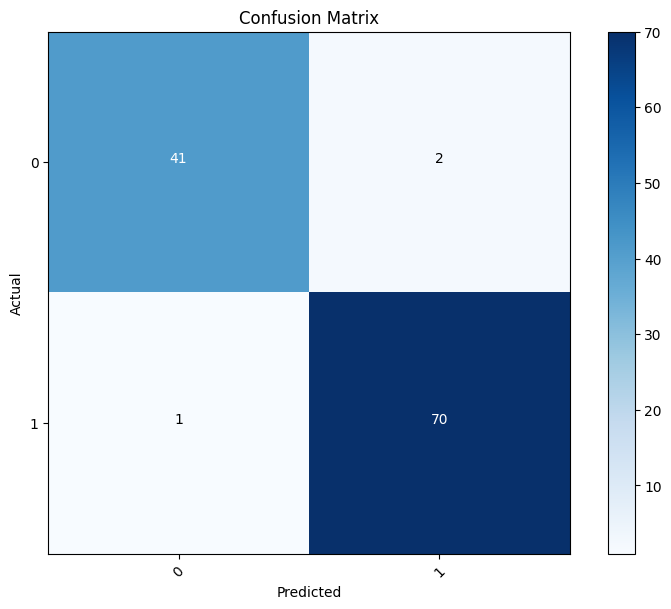

In [22]:
# Function to create a confusion matrix heatmap with dynamic text color
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix heatmap with dynamic text color.

    Parameters:
    - cm : numpy array
        Confusion matrix array to be visualized.
    - title : str, optional
        Title of the plot (default is 'Confusion Matrix').
    - cmap : matplotlib colormap, optional
        Colormap for the heatmap (default is plt.cm.Blues).

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Display the confusion matrix as an image
    plt.title(title)  # Set the title of the plot
    plt.colorbar()  # Add a colorbar to the plot
    tick_marks = np.arange(len(cm))  # Create tick marks based on the confusion matrix size
    plt.xticks(tick_marks, ['0', '1'], rotation=45)  # Set x-axis tick labels and rotate them
    plt.yticks(tick_marks, ['0', '1'])  # Set y-axis tick labels

    # Formatting text inside the cells based on threshold
    thresh = cm.max() / 2.  # Set threshold to determine text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # Iterate over the confusion matrix cells
        plt.text(j, i, format(cm[i, j], 'd'),  # Place text in the cell
                 horizontalalignment="center",  # Center-align the text
                 color="white" if cm[i, j] > thresh else "black")  # Set text color based on threshold

    plt.tight_layout()  # Adjust the layout to fit everything
    plt.ylabel('Actual')  # Set the y-axis label
    plt.xlabel('Predicted')  # Set the x-axis label
    plt.show()  # Display the plot

# Plotting the confusion matrix
import itertools  # Import itertools for product function

plot_confusion_matrix(conf_matrix)  # Call the function with the confusion matrix



In [23]:
# Saving the dataset to a CSV file named 'breast_cancer_data.csv', without saving the index column
df.to_csv('breast_cancer_data.csv', index=False)


In [24]:
# Importing the joblib library for saving and loading Python objects
import joblib


In [25]:
# Saving the trained logistic regression model 'model' to a file named 'logistic_regression_model.pkl' using joblib
joblib.dump(model, 'logistic_regression_model.pkl')

# Loading the saved logistic regression model from 'logistic_regression_model.pkl' into 'loaded_model' using joblib
loaded_model = joblib.load('logistic_regression_model.pkl')


In [26]:
new_data = pd.DataFrame(np.array([[14.0, 20.0, 90.0, 500.0, 0.1, 0.2, 0.2, 0.1, 0.2, 0.1,
                                   1.0, 1.0, 6.0, 80.0, 0.01, 0.05, 0.06, 0.02, 0.03, 0.007,
                                   16.0, 30.0, 100.0, 600.0, 0.15, 0.4, 0.4, 0.15, 0.3, 0.08]]),
                     columns=data.feature_names)

In [27]:
# Predict the class of the new data
new_data_prediction = loaded_model.predict(new_data)  # Use the trained model to predict the class of new data

# Interpret and print the prediction result
if new_data_prediction[0] == 0:  # Check if the predicted class is 0
    print("Prediction for the new data: 0  (No Cancer)")  # Print result indicating no cancer
else:
    print("Prediction for the new data: 1 (Cancer)")  # Print result indicating cancer


Prediction for the new data: 0  (No Cancer)


C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
new_data_scaled = scaler.transform(new_data)  # Transforming the test data using the fitted scale

In [35]:
# Predict the class of the new data
new_data_prediction_scaled = loaded_model.predict(new_data_scaled)  # Use the trained model to predict the class of new data

# Interpret and print the prediction result
if new_data_prediction_scaled[0] == 0:  # Check if the predicted class is 0
    print("Prediction for the new data: 0  (No Cancer)")  # Print result indicating no cancer
else:
    print("Prediction for the new data: 1 (Cancer)")  # Print result indicating cancer


Prediction for the new data: 0  (No Cancer)
